# 오디오 분류(Audio Classification)

* 가상 악기를 활용해 악기별 음색 데이터셋을 활용해 오디오 분류

1. 기존 데이터에서 분류에 사용되는 방법을 사용해 분류
2. 오디오 데이터에 특화된 분류

* 출처: https://bab2min.tistory.com/642

### 데이터 준비 및 전처리

In [ ]:
!pip install librosa
!pip install matplotlib
!pip install keras
!pip install tensorflow
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


캡스톤 공유드라이브 링크 : 

https://drive.google.com/drive/folders/15TeC_Wjt4UZfVshphLeTEcyTy5Y-spx_?usp=share_link

https://drive.google.com/drive/folders/16hUns6lt7R4Al-uB3uLrn7KeE1ZlezGd?usp=share_link

In [ ]:
# 폴더 링크에서 폴더 ID 추출
folder_link = "https://drive.google.com/drive/folders/16hUns6lt7R4Al-uB3uLrn7KeE1ZlezGd?usp=share_link"
folder_id = folder_link.split("/")[-1]
print(folder_id)

16hUns6lt7R4Al-uB3uLrn7KeE1ZlezGd?usp=share_link


In [ ]:
!rm -rf /content/drive/*

In [ ]:

# 폴더 마운트
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


위까지 파일 다운로드

In [ ]:
#베토벤 매칭\
#https://drive.google.com/file/d/1d5sBVG7KWPGz4UXtdfvlMkcNz_ZMatUB/view?usp=share_link
!gdown 1d5sBVG7KWPGz4UXtdfvlMkcNz_ZMatUB --output Beethoven.txt

Downloading...
From: https://drive.google.com/uc?id=128uGwuK9g45hBmbIkccmd3215Kj1oKZC
To: /content/Beethoven.txt
100% 1.17k/1.17k [00:00<00:00, 7.45MB/s]


일단 여기서부터 처리 중

이전 이미지-라벨링 코드예시

In [ ]:
# 폴더 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#이전에 처리해둔 사전과 전처리 라벨링 가져옴, zip파일 형태 다운
%cd /content/
#https://drive.google.com/file/d/1-DNWAgHzrMe8e6YM8RXleaLK6vp6WBH8/view?usp=share_link
!gdown 1-DNWAgHzrMe8e6YM8RXleaLK6vp6WBH8 --output word.zip

/content
Downloading...
From: https://drive.google.com/uc?id=1-DNWAgHzrMe8e6YM8RXleaLK6vp6WBH8
To: /content/word.zip
100% 13.0k/13.0k [00:00<00:00, 57.1MB/s]


In [ ]:
#압축해제
import zipfile
path_to_zip_file = '/content/word.zip'
directory_to_extract_to = 'word'

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

여기서는 넘파이 형태의 배열과 딕셔너리를 통한 라벨링으로 만들어야 함

In [ ]:
#음악파일 폴더
#https://drive.google.com/drive/folders/16hUns6lt7R4Al-uB3uLrn7KeE1ZlezGd

In [ ]:
#텍스트 파일 읽음
def read(path, target):
  file_path = f"{path}/{target}"

  with open(file_path, "r") as f:
    contents = f.read()

  # print(contents)
  base = contents.split("\n")
  return base
  f.close()

In [ ]:
a = "ClassicMusic/Lyric Pieces Book II, Opus 38 (1883)/1'"
b = "ClassicMusic/Lyric Pieces Book II , Opus 38 (1883)/1".replace(" ,", ",")
print(b)

ClassicMusic/Lyric Pieces Book II, Opus 38 (1883)/1


In [ ]:
#이 path에서 위의 파일을 기준으로 가져와야 함!
#/content/drive/MyDrive/캡스톤/dataset 백진욱 김하영/클래식 악장 음원 크롤링 백진욱/ClassicMusic/Sonata No. 5 C minor, Opus 10/1 (1798)/1
#근데 파일명에 /을 colab에서 가져오니 인식이 안됨!! 따라서 공백으로 변경

audio_np=[]
inst=[]

import os
from scipy.io import wavfile
import librosa
path = "/content/drive/MyDrive/캡스톤/dataset 백진욱 김하영/클래식 악장 음원 크롤링 백진욱/ClassicMusic" #/content/drive/MyDrive/캡스톤/dataset 백진욱 김하영/클래식 악장 음원 크롤링 백진욱/ClassicMusic"
labelpath = "/content/word"
check = 0
for target in os.listdir(labelpath):
  print(target)
  if target[0] == "T":
    base = read(labelpath, target)
    print(base)
    for i in range(len(base)):
      if base[i]:
        if base[i][:3] in ["1 -", "2 -", "3 -", "4 -", "5 -", "6 -", "7 -", "8 -", "9 -"]:
          inst.append(list(map(int, base[i].split()[2:]))) #다중 라벨
          # inst.append(int(base[i].split()[2])) #일단 한개만 라벨링
          # print(base[i])
          # print(f"여기까지 됨{target} {filepath}/{base[i][0]}")
          t = 0 #폴더안에 MP3가 몇개 있는 지 체크
          for file in os.listdir(f"{filepath}/{base[i][0]}"): #악장을 의미하는 숫자 붙여서 파일안 파일 접근
            if file[-4:] == ".mp3":
              print(f"{filepath}/{base[i][0]}/{file}")
              audio, sr = librosa.load(f"{filepath}/{base[i][0]}/{file}")
              # print(audio[:10])
              audio_np.append(audio)
              t += 1
          if t != 1:
            print(t)
            print(base[i])
            print(f"\n\nmp3 파일이 이상함 {target} {filepath}/{base[i][0]}\n\n")
            check += 1
            break
        else:
          tmp = base[i].replace("/", " ").replace(" ,", ",")
          filepath = f"{path}/{tmp}" #곡명 붙임
          # audio는 int16 형식의 numpy 배열입니다.
if check != 0:
  print('뭔가 안 맞음', check)
if len(audio_np) != len(inst):
  print("error!")
print(len(audio_np), len(inst))

T_E_Granados.txt
['Danzas españolas (1900)', '1 - 75 83 14 55 25 235', '2 - 236 83 129 41 25 4 237', '3 - 238 83 8 15 25 0', '']
/content/drive/MyDrive/캡스톤/dataset 백진욱 김하영/클래식 악장 음원 크롤링 백진욱/ClassicMusic/Danzas españolas (1900)/1/gra_esp_2.mp3
/content/drive/MyDrive/캡스톤/dataset 백진욱 김하영/클래식 악장 음원 크롤링 백진욱/ClassicMusic/Danzas españolas (1900)/2/gra_esp_3.mp3
/content/drive/MyDrive/캡스톤/dataset 백진욱 김하영/클래식 악장 음원 크롤링 백진욱/ClassicMusic/Danzas españolas (1900)/3/gra_esp_4.mp3
T_E_Schumann.txt
['Abegg Variations, Opus 1 (1830)', '1 - 25 54 84 13 8 20 18 34 2 4 243 310 26 1 311 134 41', '', 'Scenes from Childhood, Opus 15 (1838)', '1 - 61 133 59 16 42 248', '2 - 8 248 312 162 216 41 20', '3 - 8 1 140 216 248 162 19 196 205', '4 - 14 13 135 64 129 30 38', '5 - 28 42 41 207 8 84 169 41 313', '6 - 314 222 0 315 243 1 162 0 312 136 34', '7 - 15 248 98 162 54 13 25 4 7 241 42 208 64',

In [ ]:
#inst 다중 라벨링을 일단 한개만 함
for i in range(len(inst)):
  inst[i] = inst[i][0]
print(inst[:10], len(inst))

[1, 8, 8, 2, 18, 16, 178, 8, 14, 38] 310


In [ ]:
print(len(audio_np[0]))

4585536


In [ ]:
long = 0
for elem in audio_np:
  long = max(long, len(elem))
print(long)

29215744


In [ ]:
with open('/content/drive/MyDrive/캡스톤/original.txt', 'w') as f:
    for row in audio_np:
        f.write(' '.join(map(str, row)) + '\n')

In [ ]:
with open('/content/original_inst.txt', 'w') as f:
    for row in inst:
        f.write(' '.join(map(str, row)) + '\n')

In [ ]:
from google.colab import files

files.download('/content/drive/MyDrive/캡스톤/original.txt')
# files.download('/content/original_inst.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil
shutil.move('/content/original.txt', '/content/drive/MyDrive/캡스톤/실제 데이터와 매칭 김신영/original.txt')

'/content/drive/MyDrive/캡스톤/실제 데이터와 매칭 김신영/original.txt'

In [ ]:
padded_audio_list= []
for elem in audio_np:
  padded_audio = librosa.util.fix_length(elem, size = long)
  padded_audio_list.append(padded_audio)

import numpy as np
audio_np = np.array(padded_audio_list, np.float32)
print(audio_np.shape, len(inst))
np.save("/content/original_audio.npy", audio_np)

In [ ]:
from google.colab import files

files.download('/content/original_audio.npy')

In [ ]:
audio_mfcc = []
sr = 22050
for y in audio_np:
    ret = librosa.feature.mfcc(y=y,sr=sr)
    audio_mfcc.append(ret)
mfcc_np = np.array(audio_mfcc,np.float32)
# inst_np = np.array(inst, np.int16)
print(sr)
print(mfcc_np.shape, len(inst))
np.save("/content/drive/MyDrive/original_mfcc.npy", mfcc_np)

In [ ]:
print(len(audio_np), len(inst))
print(len(audio_np[0]))
print(audio_np[1][:10], inst[:2])
sr = 22050
max_len = 100000 #1000000
padded_audio_list = []
padded_label_list = []

check  = 0
for i in range(len(audio_np)):
  print(check)
  a = audio_np[i][:max_len]
  if len(a) == max_len:
    padded_audio_list.append(a)
    padded_label_list.append(inst[i])
    copy_cnt = 1
    print(len(a), copy_cnt)
  else:
    padded_audio = librosa.util.fix_length(a, size = max_len)
    padded_audio_list.append(padded_audio)
    padded_label_list.append(inst[i])
    print("처음이 마지막 처리")
    check += 1
    continue
  while len(a) == max_len:
    a = audio_np[i][max_len*copy_cnt:max_len*(copy_cnt+1)]
    if len(a) != max_len and len(a) >= max_len*0.5:
      print(len(a), "나중에 마지막 처리")
      check += 1
      padded_audio = librosa.util.fix_length(a, size = max_len)
      padded_audio_list.append(padded_audio)
      padded_label_list.append(inst[i])
      print(copy_cnt+1)
      break
    elif len(a) != max_len:
      print(len(a), "사라진 마지막 처리")
      check += 1
      break
    padded_audio_list.append(a)
    padded_label_list.append(inst[i])
    copy_cnt += 1
    print(len(a), copy_cnt)

print(padded_audio_list[1][:10], padded_label_list[:10])
print(check, len(padded_audio_list), len(padded_label_list))

3 3
5012352
[-1.0913936e-11 -3.6379788e-11 -3.6379788e-11 -2.5465852e-11
 -7.2759576e-12 -2.5465852e-11 -2.1827873e-11 -3.6379788e-12
 -2.5465852e-11 -2.5465852e-11] [[68, 69, 17, 34, 16, 70, 25, 10, 26, 71], [72, 73, 29, 15, 2, 66, 40, 12]]
0
100000 1
100000 2
100000 3
100000 4
100000 5
100000 6
100000 7
100000 8
100000 9
100000 10
100000 11
100000 12
100000 13
100000 14
100000 15
100000 16
100000 17
100000 18
100000 19
100000 20
100000 21
100000 22
100000 23
100000 24
100000 25
100000 26
100000 27
100000 28
100000 29
100000 30
100000 31
100000 32
100000 33
100000 34
100000 35
100000 36
100000 37
100000 38
100000 39
100000 40
100000 41
100000 42
100000 43
100000 44
100000 45
100000 46
100000 47
100000 48
100000 49
100000 50
12352 사라진 마지막 처리
1
100000 1
100000 2
100000 3
100000 4
100000 5
100000 6
100000 7
100000 8
100000 9
100000 10
100000 11
100000 12
100000 13
100000 14
100000 15
100000 16
100000 17
100000 18
100000 19
100000 20
100000 21
100000 22
100000 23
100000 24
100000 25
10000

In [ ]:
for i in range(len(padded_audio_list)):
  if len(padded_audio_list[i]) != max_len:
    print(i, len(padded_audio_list[i]))
    break

In [ ]:
with open('/content/inst.txt', 'w') as f:
    for row in padded_label_list:
        f.write(' '.join(map(str, row)) + '\n')

In [ ]:
with open('/content/inst.txt', 'r') as f:
    lines = f.readlines()
my_list = []
for line in lines:
    row = line.strip().split()  # 공백으로 분리
    row = [int(item) for item in row]  # 정수로 변환
    my_list.append(row)
print(my_list[:10])
print(padded_label_list[:10])
print(len(my_list), len(padded_label_list))

[[1, 34, 0, 8, 17], [1, 34, 0, 8, 17], [1, 34, 0, 8, 17], [1, 34, 0, 8, 17], [1, 34, 0, 8, 17], [1, 34, 0, 8, 17], [1, 34, 0, 8, 17], [1, 34, 0, 8, 17], [1, 34, 0, 8, 17], [1, 34, 0, 8, 17]]
[[1, 34, 0, 8, 17], [1, 34, 0, 8, 17], [1, 34, 0, 8, 17], [1, 34, 0, 8, 17], [1, 34, 0, 8, 17], [1, 34, 0, 8, 17], [1, 34, 0, 8, 17], [1, 34, 0, 8, 17], [1, 34, 0, 8, 17], [1, 34, 0, 8, 17]]
1696 1696


In [ ]:
print(type(padded_audio_list))

<class 'list'>


In [ ]:
import numpy as np
audio_np = np.array(padded_audio_list, np.float32)
print(audio_np.shape, len(padded_label_list))
np.save("/content/drive/MyDrive/캡스톤/실제 데이터와 매칭 김신영/audio.npy", audio_np)

(131, 100000) 131


In [ ]:
import numpy as np
import itertools
import librosa
import librosa.display
import IPython.display as ipd
import time
import matplotlib.pyplot as plt
#import tensorflow as tf
#from tensorflow import keras
plt.style.use('seaborn-white')

<ipython-input-170-0d50065fec12>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


* 데이터를 저장할 리스트와 파일을 불러올 경로를 지정

* http://suanlab.com/datasets/GeneralMidi.wav



In [ ]:
!wget http://suanlab.com/datasets/GeneralMidi.wav

--2023-05-14 08:30:47--  http://suanlab.com/datasets/GeneralMidi.wav
Resolving suanlab.com (suanlab.com)... 52.219.206.16
Connecting to suanlab.com (suanlab.com)|52.219.206.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3409459756 (3.2G) [audio/wav]
Saving to: ‘GeneralMidi.wav’

GeneralMidi.wav     100%[===================>]   3.17G  11.7MB/s    in 4m 55s  

2023-05-14 08:35:43 (11.0 MB/s) - ‘GeneralMidi.wav’ saved [3409459756/3409459756]



In [ ]:
midi_file = './GeneralMidi.wav'

* wmv 파일에는 128개 악기와 46개 타악기의 음을 50개씩 2초 간격으로 존재
* 해당 예제에서는 일부 악기만 선택해서 사용

In [ ]:
instruments = [0,10,20,30,40,50,60,70,80,90]
num_notes = 50
sec = 2

audio = []
inst = []

for inst_idx, note in itertools.product(range(len(instruments)),range(num_notes)):
    instrument = instruments[inst_idx]
    offset = (instrument*num_notes*sec) + (note*sec)
    print('instrument: {}, note: {}, offset: {}'.format(instrument,note,offset))
    y, sr = librosa.load(midi_file, sr=None,offset=offset, duration=2.0)
    audio.append(y)
    inst.append(inst_idx)

instrument: 0, note: 0, offset: 0
instrument: 0, note: 1, offset: 2
instrument: 0, note: 2, offset: 4
instrument: 0, note: 3, offset: 6
instrument: 0, note: 4, offset: 8
instrument: 0, note: 5, offset: 10
instrument: 0, note: 6, offset: 12
instrument: 0, note: 7, offset: 14
instrument: 0, note: 8, offset: 16
instrument: 0, note: 9, offset: 18
instrument: 0, note: 10, offset: 20
instrument: 0, note: 11, offset: 22
instrument: 0, note: 12, offset: 24
instrument: 0, note: 13, offset: 26
instrument: 0, note: 14, offset: 28
instrument: 0, note: 15, offset: 30
instrument: 0, note: 16, offset: 32
instrument: 0, note: 17, offset: 34
instrument: 0, note: 18, offset: 36
instrument: 0, note: 19, offset: 38
instrument: 0, note: 20, offset: 40
instrument: 0, note: 21, offset: 42
instrument: 0, note: 22, offset: 44
instrument: 0, note: 23, offset: 46
instrument: 0, note: 24, offset: 48
instrument: 0, note: 25, offset: 50
instrument: 0, note: 26, offset: 52
instrument: 0, note: 27, offset: 54
instrum

In [ ]:
import numpy as np
audio_np = np.array(padded_audio_list, np.float32)
inst_np = np.array(padded_label_list, np.int16)
print(audio_np.shape, inst_np.shape)

(1696, 1000000) (1696,)


In [ ]:

np.save('/content/inst.npy', inst_np)

In [ ]:
print(audio_np[0][:10])
print(padded_label_list[2])
print(audio_np[0][:10])
print(inst_np[2])

[-0.00061591 -0.00106229 -0.00012719 -0.00029592 -0.00146961 -0.00163759
 -0.00070645  0.00039949  0.00021338 -0.00021153]
1
[-0.00061591 -0.00106229 -0.00012719 -0.00029592 -0.00146961 -0.00163759
 -0.00070645  0.00039949  0.00021338 -0.00021153]
1


In [ ]:
import numpy as np

np.save('/content/audio.npy', audio_np)
np.save('/content/inst.npy', inst_np)


In [ ]:

np.save("/content/drive/MyDrive/캡스톤/실제 데이터와 매칭 김신영/audio.npy", audio_np)

In [ ]:
from google.colab import files

files.download('/content/audio.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

여기서 부터 돌려도 됨!
전처리 및 numpy 파일을 로드해서 사용

In [ ]:
import numpy as np
#이전에 처리해둔 사전과 전처리 라벨링 가져옴, zip파일 형태 다운
%cd /content/
!gdown 1bewsF-RpEFRDMjRJZaidtVzl1sMhn_Sg --output audio.npy
#https://drive.google.com/file/d/1bewsF-RpEFRDMjRJZaidtVzl1sMhn_Sg/view?usp=share_link
!gdown 1hkuvdXzUJxw2WYgyADca40tjdfTJFGOI --output inst.npy
!https://drive.google.com/file/d/1hkuvdXzUJxw2WYgyADca40tjdfTJFGOI/view?usp=share_link
# 배열 로드
audio_np = np.load('/content/audio.npy')
inst_np = np.load('/content/inst.npy')


/content
Downloading...
From: https://drive.google.com/uc?id=1bewsF-RpEFRDMjRJZaidtVzl1sMhn_Sg
To: /content/audio.npy
100% 6.78G/6.78G [01:15<00:00, 90.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hkuvdXzUJxw2WYgyADca40tjdfTJFGOI
To: /content/inst.npy
100% 3.52k/3.52k [00:00<00:00, 25.3MB/s]
/bin/bash: https://drive.google.com/file/d/1hkuvdXzUJxw2WYgyADca40tjdfTJFGOI/view?usp=share_link: No such file or directory


In [ ]:
#불러온 파일 확인
import librosa
import IPython.display as ipd
print(len(audio_np), len(inst_np))
sr = 22050
ipd.Audio(audio_np[932], rate=sr)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
inst_np = np.load('/content/inst.npy')
print(inst_np[0])

1


In [ ]:
num_notes = 10#50
for idx in range(0,len(audio_np),num_notes):
    plt.figure(figsize=(18,2))
    plt.plot(audio_np[idx])
    plt.ylim((-0.05,0.05))
    plt.show()

In [ ]:
import librosa
import IPython.display as ipd

# 파일 로드
# audio, sr = librosa.load("/content/drive/MyDrive/캡스톤/dataset 백진욱 김하영/클래식 악장 음원 크롤링 백진욱/ClassicMusic/Sonata No. 14 C# minor (Moonlight), Opus 27 2 (1801)/3/mond_3.mp3")
audio, sr = librosa.load("/content/drive/MyDrive/캡스톤/dataset 백진욱 김하영/클래식 악장 음원 크롤링 백진욱/ClassicMusic/Préludes, Opus 28 (1838)/1/chpn-p1.mp3")
len_audio = 1000000
print(len(audio))
# 오디오 재생
ipd.Audio(audio[:len_audio], rate=sr)


715776


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(audio_np)

MinMaxScaler()

## 머신러닝을 이용한 오디오 분류

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(audio_np,inst_np,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(1356, 1000000)
(340, 1000000)
(1356,)
(340,)


### Logistic Regression

* Logistic Regression은 특성상 다중 분류에는 적합하지 않음

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x,train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc) # 5%의 accuracy

### Support Vector Machine

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x,train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc) # 4%의 accuracy => 유튜브에는 0.03이 나옴

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DT = DecisionTreeClassifier()
DT.fit(train_x,train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc) # 34%의 accuracy => 유튜브에는 0.31이 나옴


NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_y, pred)
print(acc)

0.047058823529411764


### 결과가 잘 안나오는 이유

데이터가 매우 길기 때문에 잘 처리하지 못함

## Constant-Q를 이용한 머신러닝 오디오 분류

### 데이터 준비

* wav는 매 순간의 음압을 측정하여 그 수치를 저장한 형태이기 때문에 그 자체로 음악을 분석하기에 적합하지 않음 (음의 높이와 세기를 듣는것이지 순간의 음압을 듣는게 아니기 때문)
* 푸리에 변환과 같은 변환 기법을 이용하여 시간 축의 데이터를 주파수 축의 데이터로 바꿔줘야할 필요가 있음
* 푸리에 변환 대신 푸리에 변환과 유사한 Constant-Q 변환을 사용
* Constant-Q 변환은 주파수 축이 로그 단위로 변환되고, 각 주파수에 따라 해상도가 다양하게 처리되기 때문에(저주파는 저해상도, 고주파는 고해상도) 음악을 처리하는 데에 푸리에 변환보다 유리

*   주파수 대역을 저장할 리스트 `audio_cqt` 선언
*   constant-Q 변환할 때는 변환할 오디오 데이터와 sampling rate가 필요
*   해당 데이터에서는 sampling rate가 모두 동일하므로 따로 처리가 필요하지 않음
*   여기서는 Constant-Q 변환을 사용해 오디오 데이터를 주파수 대역으로 변환




*   변환에는 앞서 준비한 데이터를 가져와 사용하며, Constant-Q 변환에는 `librosa.cqt` 함수를 사용
*   여기서 `n_bins`는 옥타브 단계 및 개수를, `bins_per_octave`는 한 옥타브가 가지는 단계를 의미
*   라벨에 대해선 원 핫 인코딩을 적용



In [ ]:
audio_cqt = []
for y in audio:
    ret = librosa.cqt(y,hop_length=1024, n_bins=24*7,bins_per_octave=24)
    #유튜브코드 librosa.cqt(y,sr,hop_length=1024, n_bins=24*7,bins_per_octave=24)
    ret = np.abs(ret)
    audio_cqt.append(ret)
    

* 앞서 생성한 주파수 대역을 spectrogram으로 시각화
* 악기 간 spectrogram을 비교해보면 차이가 존재함을 알 수 있음

<ipython-input-20-e58aa036fa19>:3: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(amp_db,sr=sr,x_axis='time',y_axis='cqt_note')


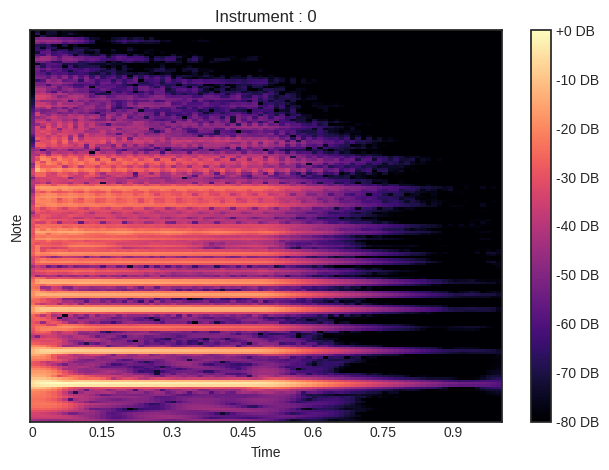

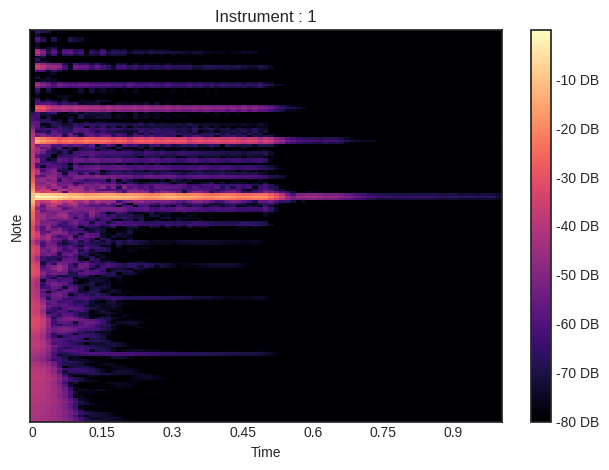

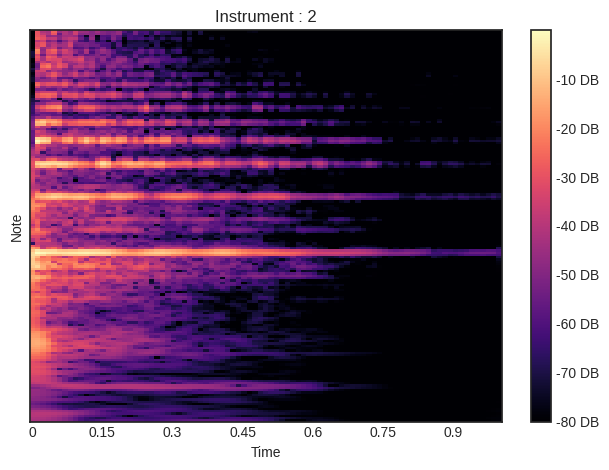

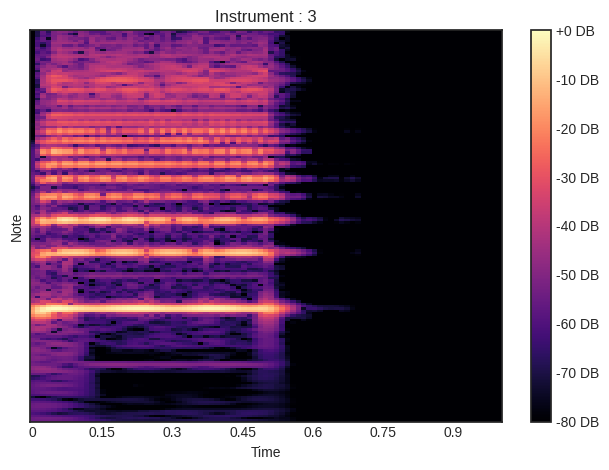

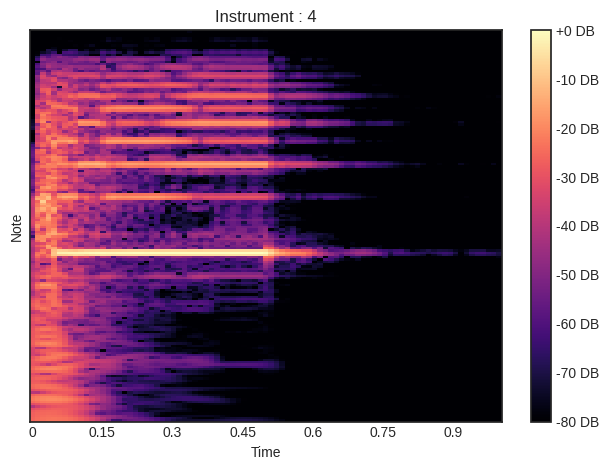

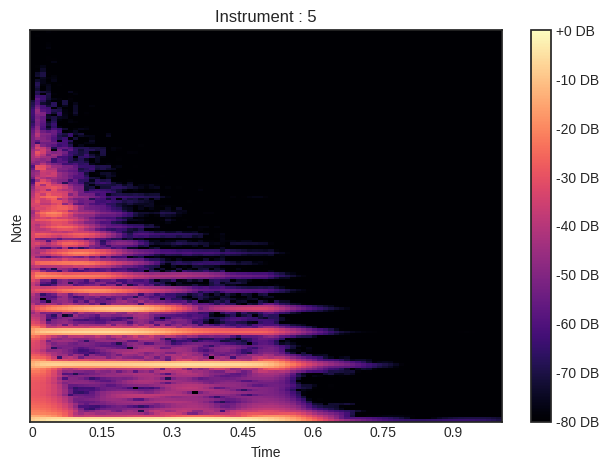

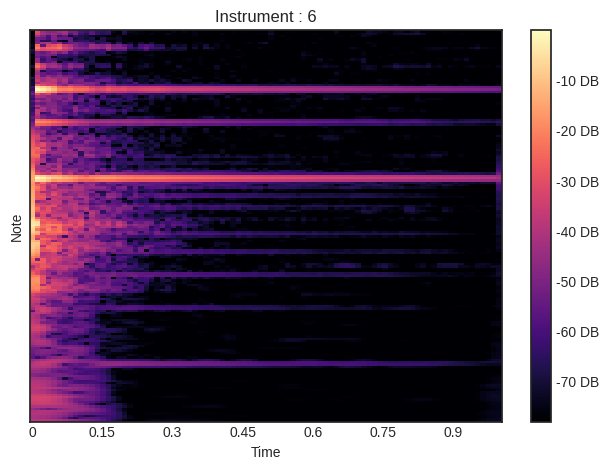

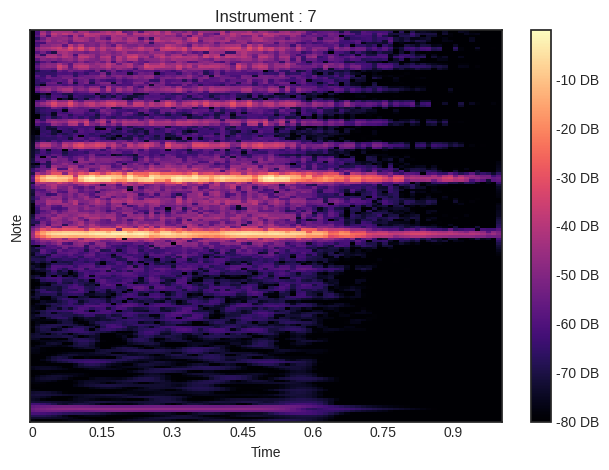

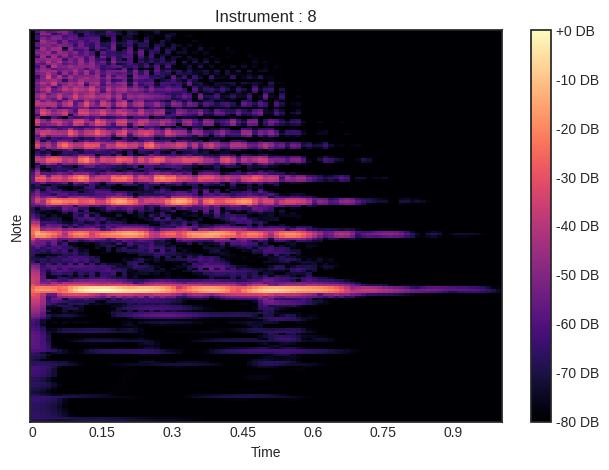

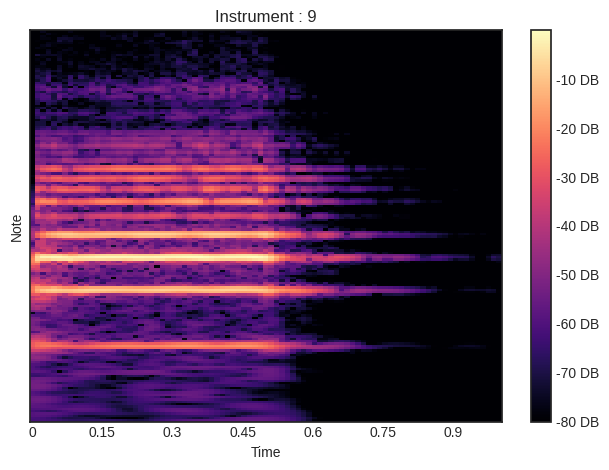

In [ ]:
for i in range(0,len(instruments)*num_notes,num_notes):
    amp_db = librosa.amplitude_to_db(np.abs(audio_cqt[i]),ref=np.max)
    librosa.display.specshow(amp_db,sr=sr,x_axis='time',y_axis='cqt_note')
    plt.colorbar(format='%+2.0f DB')
    plt.title('Instrument : {}'.format(inst[i]))
    plt.tight_layout()
    plt.show()

* 훈련 데이터와 실험 데이터를 분리

In [ ]:
cqt_np = np.array(audio_cqt,np.float32)
inst_np = np.array(inst,np.int16)

print(cqt_np.shape,inst_np.shape)

(500, 168, 87) (500,)




*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [ ]:
cqt_np = cqt_np.reshape((500,168*87))



*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(cqt_np)

MinMaxScaler()

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(cqt_np,inst_np,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 14616)
(100, 14616)
(400,)
(100,)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x,train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc) # 34%의 accuracy => 유튜브에는 0.31이 나옴

0.31


### Support Vector Machine

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x,train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc) # 34%의 accuracy => 유튜브에는 0.33이 나옴

0.33


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x,train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc) # 7%의 accuracy => 유튜브에는 0.58이 나옴


0.66


## Constant-Q 특징을 이용한 딥러닝 오디오 분류

* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성

In [ ]:
from keras.utils import to_categorical

cqt_np = np.array(audio_cqt,np.float32)
cqt_np = cqt_np.reshape((500,168*87))
cqt_array = np.expand_dims(cqt_np,-1)
inst_cat = to_categorical(inst_np)

train_x,test_x,train_y,test_y = train_test_split(cqt_array,inst_cat,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 14616, 1)
(100, 14616, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.models import Sequential,Model
from keras.layers import Input, Dense

def model_build():
    model = Sequential()
    
    input = Input(shape=(14616,),name='input')
    output = Dense(512,activation='relu',name='hidden1')(input)
    output = Dense(256,activation='relu',name='hidden2')(output)
    output = Dense(128,activation='relu',name='hidden3')(output)
    output = Dense(10,activation='relu',name='hidden4')(output)
    
    model = Model(inputs=[input],outputs=output)
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['acc'])
    return model

In [ ]:
model = model_build()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 14616)]           0         
                                                                 
 hidden1 (Dense)             (None, 512)               7483904   
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 hidden4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 7,649,418
Trainable params: 7,649,418
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x,train_y,epochs=30,batch_size=128,validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 7s 117ms/step - loss: 6.3473 - acc: 0.1406 - val_loss: 4.1618 - val_acc: 0.2250
Epoch 2/30
3/3 [==============================] - 0s 22ms/step - loss: 3.2811 - acc: 0.3875 - val_loss: 3.4061 - val_acc: 0.2250
Epoch 3/30
3/3 [==============================] - 0s 22ms/step - loss: 3.0658 - acc: 0.4500 - val_loss: 3.3350 - val_acc: 0.2750
Epoch 4/30
3/3 [==============================] - 0s 21ms/step - loss: 2.9446 - acc: 0.5437 - val_loss: 3.2499 - val_acc: 0.2625
Epoch 5/30
3/3 [==============================] - 0s 22ms/step - loss: 2.7737 - acc: 0.5938 - val_loss: 3.1839 - val_acc: 0.2625
Epoch 6/30
3/3 [==============================] - 0s 22ms/step - loss: 2.5800 - acc: 0.6562 - val_loss: 3.3734 - val_acc: 0.2500
Epoch 7/30
3/3 [==============================] - 0s 20ms/step - loss: 2.2244 - acc: 0.6875 - val_loss: 4.6067 - val_acc: 0.2750
Epoch 8/30
3/3 [==============================] - 0s 20ms/step - loss: 1.2058 - acc: 0.7125 - va

In [ ]:
def plot_history(history_dict):
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
    epochs = range(1,len(loss)+1)
    fig = plt.figure(figsize=(14,5))
    
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(epochs,loss,'b--',label='train_loss')
    ax1.plot(epochs,val_loss,'r:',label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()
    
    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(epochs,loss,'b--',label='train_accuracy')
    ax2.plot(epochs,val_loss,'r:',label='val_accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('acc')
    ax2.grid()
    ax2.legend()
    
    plt.show()

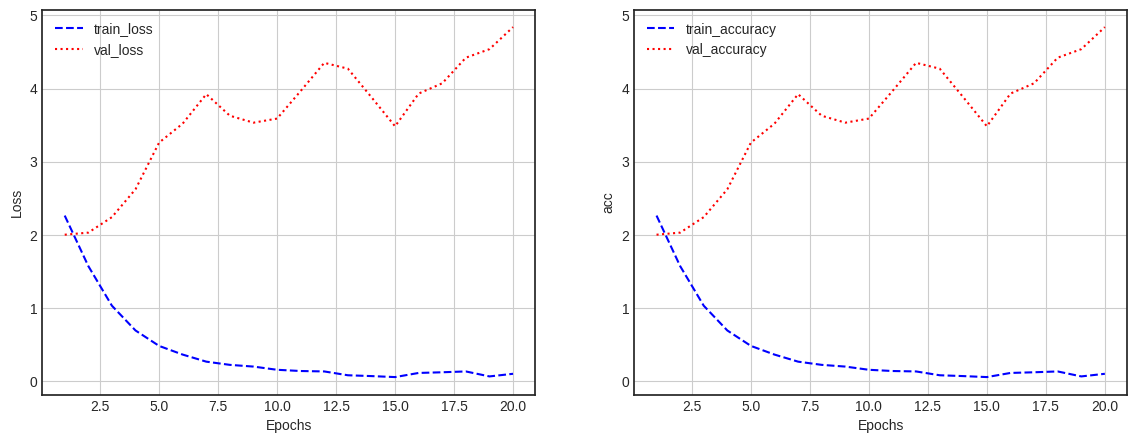

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x,test_y)

4/4 [==============================] - 0s 9ms/step - loss: 4.2312 - acc: 0.5600


[4.231195449829102, 0.5600000023841858]

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [ ]:
from keras.utils import to_categorical

cqt_np = np.array(audio_cqt,np.float32)
cqt_array = np.expand_dims(cqt_np,-1)
inst_cat = to_categorical(inst_np)

train_x,test_x,train_y,test_y = train_test_split(cqt_array,inst_cat,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 168, 87, 1)
(100, 168, 87, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten
def model_build():
    model = Sequential()
    
    input = Input(shape=(168,87,1))
    
    output = Conv2D(128,3,strides=1,padding='same',activation='relu')(input)
    output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)
    
    output = Conv2D(256,3,strides=1,padding='same',activation='relu')(input)
    output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)
    
    output = Conv2D(512,3,strides=1,padding='same',activation='relu')(input)
    output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)
    
    output = Flatten()(output)
    output = Dense(512,activation='relu')(output)
    output = Dense(256,activation='relu')(output)
    output = Dense(128,activation='relu')(output)
    
    output = Dense(10,activation='softmax')(output)
    
    model = Model(inputs=[input],outputs=output)
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['acc'])
    
    return model
    

In [ ]:
model = model_build()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 168, 87, 1)]      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 168, 87, 512)      5120      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 84, 44, 512)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1892352)           0         
                                                                 
 dense_4 (Dense)             (None, 512)               968884736 
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                           

In [ ]:
history = model.fit(train_x, train_y, epochs = 20, batch_size=128,validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 2s 168ms/step - loss: 2.2916 - acc: 0.1250 - val_loss: 2.2455 - val_acc: 0.1500
Epoch 2/20
3/3 [==============================] - 0s 87ms/step - loss: 1.7087 - acc: 0.4094 - val_loss: 2.1846 - val_acc: 0.2625
Epoch 3/20
3/3 [==============================] - 0s 88ms/step - loss: 1.1405 - acc: 0.5969 - val_loss: 2.5624 - val_acc: 0.2625
Epoch 4/20
3/3 [==============================] - 0s 87ms/step - loss: 0.7463 - acc: 0.7406 - val_loss: 2.7338 - val_acc: 0.3625
Epoch 5/20
3/3 [==============================] - 0s 87ms/step - loss: 0.5036 - acc: 0.8406 - val_loss: 3.0570 - val_acc: 0.3000
Epoch 6/20
3/3 [==============================] - 0s 89ms/step - loss: 0.4020 - acc: 0.8375 - val_loss: 3.7158 - val_acc: 0.4125
Epoch 7/20
3/3 [==============================] - 0s 88ms/step - loss: 0.3023 - acc: 0.8969 - val_loss: 3.5543 - val_acc: 0.4625
Epoch 8/20
3/3 [==============================] - 0s 87ms/step - loss: 0.1861 - acc: 0.9406 - va

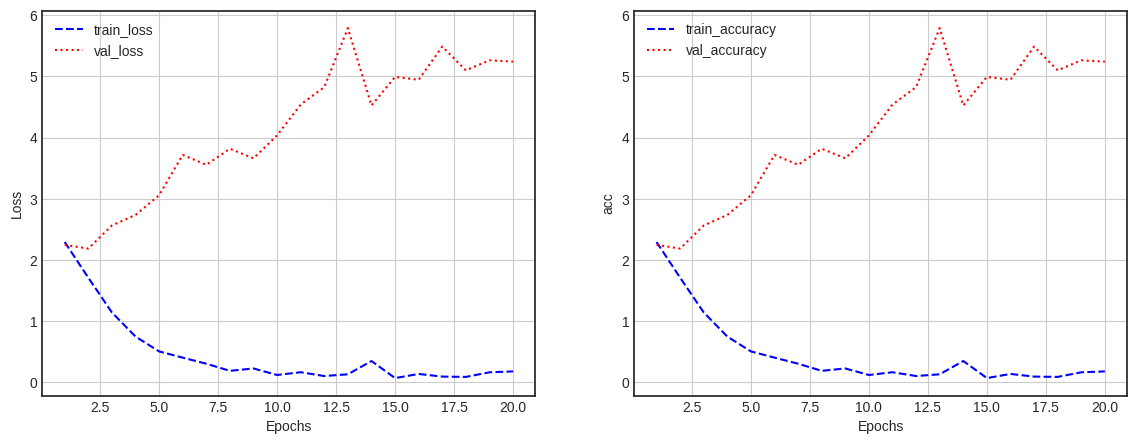

In [ ]:
plot_history(history.history)



*   훈련한 모델에 대한 정확도 평가
*   앞선 일반 분류 방법보다 정확도가 많이 오른 것을 확인할 수 있음



In [ ]:
model.evaluate(test_x,test_y)

4/4 [==============================] - 0s 9ms/step - loss: 4.6746 - acc: 0.5200


[4.674623012542725, 0.5199999809265137]

## MFCC를 이용한 머신러닝 오디오 분류

### 데이터 준비

* 데이터를 불러오고 MFCC(Mel-frequency cepstral coefficients)를 사용해 melspectrogram으로 변환

In [ ]:
audio_mfcc = []
for y in audio_np:
    ret = librosa.feature.mfcc(y=y,sr=sr)
    audio_mfcc.append(ret)

NameError: ignored

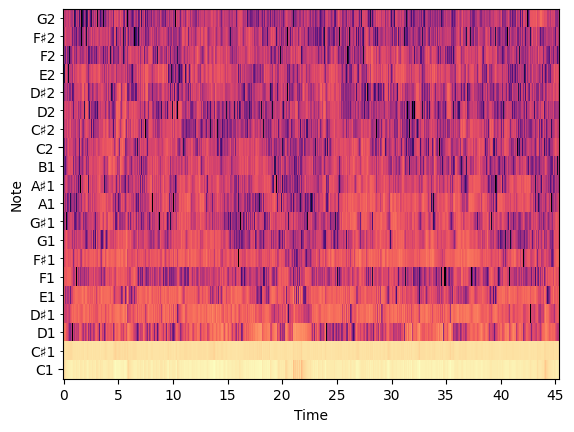

In [ ]:
for i in range(0, 2):#len(instruments)*num_notes,num_notes):
    amp_db = librosa.amplitude_to_db(np.abs(audio_mfcc[i]),ref=np.max)
    librosa.display.specshow(amp_db,sr=sr,x_axis='time',y_axis='cqt_note')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Instrument : {}'.format(inst[i]))
    plt.tight_layout()
    plt.show()

In [ ]:
mfcc_np = np.array(audio_mfcc,np.float32)
inst_np = np.array(inst, np.int16)
print(sr)
print(mfcc_np.shape, inst_np.shape)



*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [ ]:
mfcc_np = mfcc_np.reshape((29,-1))



*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(mfcc_np)

MinMaxScaler()

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(mfcc_np,inst_np,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(23, 659560)
(6, 659560)
(23,)
(6,)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x,train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc)

0.0


### Support Vector Machine

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x,train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc) 

ValueError: ignored

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x,train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc)


0.79


## MFCC를 이용한 딥러닝 오디오 분류

* 앞선 문제점을 극복하기 위해 오디오 데이터에 특화된 분류 방법 필요
* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성   
1:02:34

### DNN 모델 구성

In [ ]:
from keras.utils import to_categorical

mfcc_np = np.array(audio_mfcc, np.float32)
mfcc_np = mfcc_np.reshape((29,-1))
mfcc_array = np.expand_dims(mfcc_np, -1)
inst_cat = to_categorical(inst_np)

train_x,test_x,train_y,test_y = train_test_split(mfcc_array,inst_cat,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(23, 659560, 1)
(6, 659560, 1)
(23, 43)
(6, 43)


In [ ]:
from keras.models import Sequential,Model
from keras.layers import Input, Dense

def model_build():
    model = Sequential()
    
    input = Input(shape=(3460,),name='input')
    output = Dense(512,activation='relu',name='hidden1')(input)
    output = Dense(256,activation='relu',name='hidden2')(output)
    output = Dense(128,activation='relu',name='hidden3')(output)
    output = Dense(10,activation='relu',name='hidden4')(output)
    
    model = Model(inputs=[input],outputs=output)
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['acc'])
    return model

In [ ]:
model = model_build()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3460)]            0         
                                                                 
 hidden1 (Dense)             (None, 512)               1772032   
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 hidden4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,937,546
Trainable params: 1,937,546
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x,train_y,epochs=30,batch_size=128,validation_split=0.2)

Epoch 1/30


ValueError: ignored

In [ ]:
def plot_history(history_dict):
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
    epochs = range(1,len(loss)+1)
    fig = plt.figure(figsize=(14,5))
    
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(epochs,loss,'b--',label='train_loss')
    ax1.plot(epochs,val_loss,'r:',label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()
    
    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(epochs,loss,'b--',label='train_accuracy')
    ax2.plot(epochs,val_loss,'r:',label='val_accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('acc')
    ax2.grid()
    ax2.legend()
    
    plt.show()

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x,test_y)

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [ ]:
from keras.utils import to_categorical

mfcc_np = np.array(audio_mfcc, np.float32)
mfcc_array = np.expand_dims(mfcc_np,-1)
inst_cat = to_categorical(inst_np)

train_x,test_x,train_y,test_y = train_test_split(mfcc_array,inst_cat,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 20, 173, 1)
(100, 20, 173, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten
def model_build():
    model = Sequential()
    
    input = Input(shape=(20 , 173, 1))
    
    output = Conv2D(128,3,strides=1,padding='same',activation='relu')(input)
    output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)
    
    output = Conv2D(256,3,strides=1,padding='same',activation='relu')(input)
    output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)
    
    output = Conv2D(512,3,strides=1,padding='same',activation='relu')(input)
    output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)
    
    output = Flatten()(output)
    output = Dense(512,activation='relu')(output)
    output = Dense(256,activation='relu')(output)
    output = Dense(128,activation='relu')(output)
    
    output = Dense(10,activation='softmax')(output)
    
    model = Model(inputs=[input],outputs=output)
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['acc'])
    
    return model
    

In [ ]:
model = model_build()
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20, 173, 1)]      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 173, 512)      5120      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 87, 512)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 445440)            0         
                                                                 
 dense_8 (Dense)             (None, 512)               228065792 
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                           

In [ ]:
history = model.fit(train_x, train_y, epochs = 20, batch_size=128,validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 3s 221ms/step - loss: 746.2303 - acc: 0.1156 - val_loss: 1144.2842 - val_acc: 0.1500
Epoch 2/20
3/3 [==============================] - 0s 35ms/step - loss: 1170.4851 - acc: 0.1281 - val_loss: 845.7662 - val_acc: 0.1125
Epoch 3/20
3/3 [==============================] - 0s 35ms/step - loss: 803.6891 - acc: 0.0875 - val_loss: 573.0862 - val_acc: 0.2500
Epoch 4/20
3/3 [==============================] - 0s 36ms/step - loss: 441.3946 - acc: 0.1813 - val_loss: 435.2921 - val_acc: 0.1375
Epoch 5/20
3/3 [==============================] - 0s 34ms/step - loss: 301.2342 - acc: 0.1500 - val_loss: 200.0750 - val_acc: 0.2125
Epoch 6/20
3/3 [==============================] - 0s 33ms/step - loss: 118.9278 - acc: 0.2656 - val_loss: 74.9665 - val_acc: 0.3250
Epoch 7/20
3/3 [==============================] - 0s 34ms/step - loss: 55.9855 - acc: 0.2562 - val_loss: 39.6314 - val_acc: 0.2750
Epoch 8/20
3/3 [==============================] - 0s 34ms/step - loss

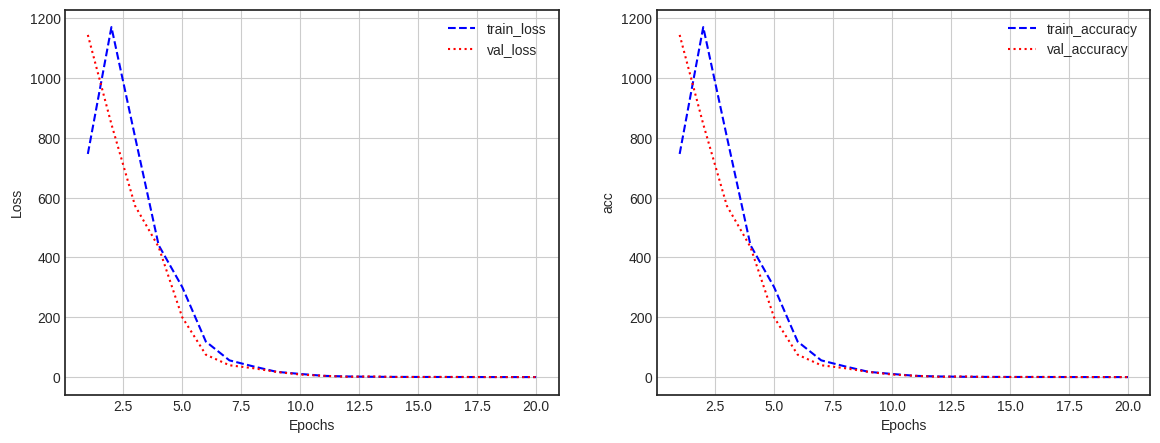

In [ ]:
plot_history(history.history)



*   훈련한 모델에 대한 정확도 평가
*   앞선 일반 분류 방법보다 정확도가 많이 오른 것을 확인할 수 있음



In [ ]:
model.evaluate(test_x,test_y)

4/4 [==============================] - 0s 15ms/step - loss: 0.5178 - acc: 0.9300


[0.5177686214447021, 0.9300000071525574]